In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
#nltk.download('stopwords')
#nltk.download("punkt")

In [99]:
df = pd.read_csv("dataset.csv")
df.head(5)

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL


In [100]:
df.describe()

,score,thumbsUpCount
count,43366.000000,43366.000000
mean,4.374026,2.007748
std,1.205079,12.353477
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,561.000000


In [101]:
print("Number of NaNs for each column")
df.isnull().sum()

Number of NaNs for each column


reviewId                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     4907
at                          0
replyContent            40889
repliedAt               40889
predicted_category          0
sentiment                   0
dtype: int64

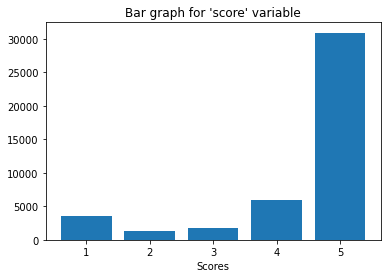

In [103]:
plt.bar(df["score"].value_counts().keys(), df["score"].value_counts().values)
plt.title("Bar graph for 'score' variable")
plt.xlabel("Scores")
plt.show()

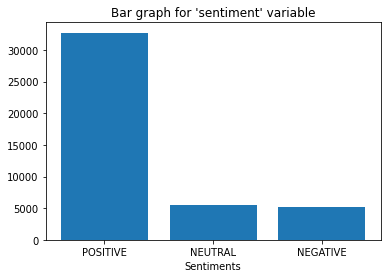

In [104]:
plt.bar(df["sentiment"].value_counts().keys(), df["sentiment"].value_counts().values)
plt.title("Bar graph for 'sentiment' variable")
plt.xlabel("Sentiments")
plt.show()

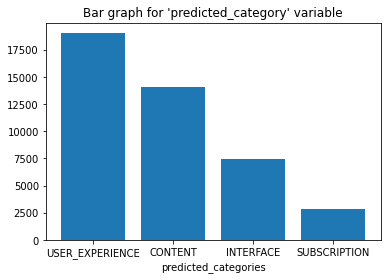

In [105]:
plt.bar(df["predicted_category"].value_counts().keys(), df["predicted_category"].value_counts().values)
plt.title("Bar graph for 'predicted_category' variable")
plt.xlabel("predicted_categories")
plt.show()

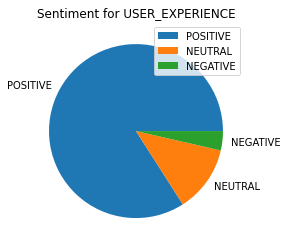

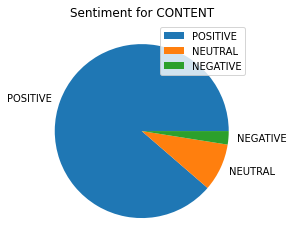

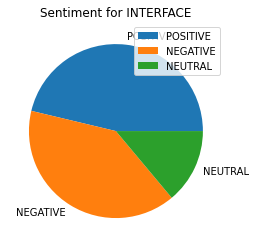

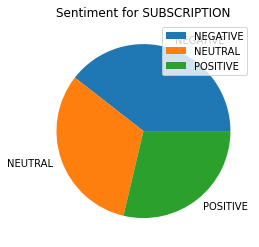

In [106]:
for predicted_category in df["predicted_category"].value_counts().keys():
    filtered_df = df[df["predicted_category"] == predicted_category]["sentiment"]
    plt.pie(filtered_df.value_counts().values, labels = filtered_df.value_counts().keys())
    plt.legend()
    plt.title(f"Sentiment for {predicted_category}")
    plt.show()

In [107]:
sWords = stopwords.words("english")#lista di stopwords per l'inglese
stringa_totale = ""

for review in df["content"]:
    stringa_totale += " "+review

stringa_totale[:100]

" woww let me know more details about this i've been using this for a while and there's a basic bug t"

In [108]:
lista_tokens = nltk.word_tokenize(stringa_totale) #tokenizza il testo di tutte le recensioni. Impiega circa 3 minuti

In [111]:
tokens_puliti = [] #lista dei tokens escluse le stopwords
for token in lista_tokens:
    if token not in sWords:
        tokens_puliti.append(token)
tokens_puliti[:10]

['woww',
 'let',
 'know',
 'details',
 "'ve",
 'using',
 "'s",
 'basic',
 'bug',
 'still']

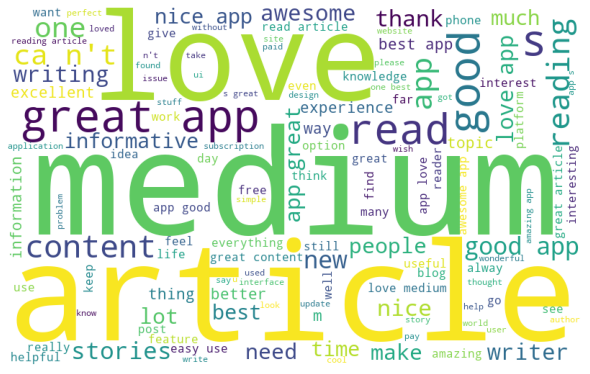

In [119]:
temp = " ".join(tokens_puliti) #stringa pulita di testo da passare a wordcloud

wCloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wCloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()